# АНАЛИЗ ПРОДАЖ КОМПЬЮТЕРНЫХ ИГР


**Цель**: Выявить параметры, определяющие успешность игр, для дальнейшего управления продуктами (определение перспективных / стагнирующих сфер, распределение рекламных бюджетов, текущая / перспективная популярность).

**Данные**: Исторические данные о выпущенных играх с продажами по регионам. Данные за 2016 год могут быть не полными.

# Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, просит проанализировать данные, полученные из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г.



# Описание данных


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.

# Этапы выполнения проекта

## 1 Обзор данных

- Посмотреть информацию по таблице
- Наметить необходимые шаги предобработки

## 2 Предобработка данных

- скорректировать внешний вид (названия столбоц)
- скорректировать типы столбцов (при необходимости)
- заполнить либо удалить пропуски и дубликаты
- скорректировать илибо удалить выбросы и аномалии
- добавить нужные метрики в датафрейм: суммарные продажи во всех регионах

## 3 Исследовательский анализ



- Посчитать, сколько игр выпускалось в разные годы. **Вопрос** - Важны ли данные за все периоды?
- Проверить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. **Вопрос** - За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определится в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Выберать  несколько потенциально прибыльных платформ. **Вопрос** - Какие платформы лидируют по продажам, растут или падают?
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать  результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. **Вопрос** - Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## 4 Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):


- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## 5 Проверить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## 6 Общий вывод

## 1 Обзор данных

### Откроем файл и посмотрим информацию о таблице. Отметим необходимые корректировки

In [ ]:
# Импортируем необходимые библиотеки и прочитаем файл с данными

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

In [ ]:
#Прочитаем файл
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\Users\\magas\\Desktop\\Проекты\\games.csv')

In [ ]:
# Посмотрим на первые 10 строк таблицы
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу обращаем внимание на регистр названий столбцов. Надо все привести к одному регистру.


In [ ]:
#Посмотри информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нужно привести столбец `year_of_release` в корретный формат

In [ ]:
# Посмотрим информацию о пропусках
print(data.isna().sum())
#Посмотрим,какую долю занимают пропуски
data.isna().sum()/len(data)*100

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Пропуски в столбцах `name`,`year_of_release`,`genre`,`critic_score`,`user_score`,`rating`.

In [ ]:
#Проверим дубликаты
data.duplicated().sum()

0

Явных дубликатов нет

In [ ]:
#Посмотрим на уникальные значения в стобце genre
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов нет

**ОБЩИЙ ВЫВОД**

Данные в хорошем состоянии, пропусков немного, дубликатов нет.

## Предобработка данных

In [ ]:
# Приведем названия колонок к нижнему регистру

data.columns = data.columns.str.lower()

In [ ]:
#Посмотри пропуски в столбе name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Практически пустые строки. И совпадают с пропусками в столбце `genre`. Удаляем

In [ ]:
#Удаляем пропуски в name
data=data.dropna(subset=['name'])

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
#Посмотрим на пропуски в столбце year_of_release

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполнить пропуски мы не можем, потому удалим их. 269 из 16713 - меньше 2%

In [ ]:
data=data.dropna(subset=['year_of_release'])

In [ ]:
#Приведем столбец к типу int для наглядности, простоты расччетов и построения графиков
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [ ]:
#Посмотрим на пропуски в столбце rating
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков слишком много. И чаще они совпадают с пропусками в столбцах `critic_score` и `user_score`. Удалять нельзя. Но и заполнить по данным из других столбцов не можем.
`
В дальнейшем иследовании, данные столбцы практически не участвуют, потому создадим таблицу `data_no_score`, в которой будет все данные, за исключением этих трех столбцов и на ней будет проводить исследования. Когда же потребуются эти три столбца, будем использовать изначальную таблицу.

In [ ]:
data['rating'] = data['rating'].fillna('Unknown')

В дальнейшем иследовании, данные в столбцах `critic_score` и `user_score` практически не участвуют, потому создадим таблицу `data_no_score`, в которой будет все данные, за исключением этих трех столбцов и на ней будет проводить исследования. Когда же потребуются эти три столбца, будем использовать изначальную таблицу.

Перед разделением  добавим столбец `total_sales` с информацией о сумарных продажах, дабы этот столбец был в обеих таблицах

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data['user_score'] = data['user_score'].replace('tbd','NaN')
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

In [ ]:
data_no_score = data.drop(['critic_score','user_score','rating'],axis=1)

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

In [ ]:
#Посмотрим, какие есть значения и как распределены
data['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Если верить открытым источникам:

категории E и К-А - одно и то же: Игры, подходящие всем возрастным категориям.
категории М и АО - только для взрослых

Эти категории можно объединить.

ЕС слишком мало для изучения как отдельной категории, потому тоже добавим в E

RP посмотрим, что за игра, и интуитивно подставим нудный рейтинг


In [ ]:
data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP,0.04


Supreme Ruler: Cold War	 имеет рейтинг PEGI 7+ -для лиц, старше 7 лет - отнесем ее в ЕС10+

In [ ]:
#Заменим значения
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('AO', 'M')
data['rating'] = data['rating'].replace('EC', 'E')
data['rating'] = data['rating'].replace('RP', 'E10+')

### ОБЩИЙ ВЫВОД

Поправили названия столбцов.
удалили пропуски
Разделили данные на две таблицы:
- первоначальная `data` - хранить всю информацию
- `data_no_score` - данные без столбцов рейтинга и отзывов
- добавили столбец `total_sales` с информацией о суммарных продажах по регионам

## 3 Исследовательский анализ

### - Посчитать, сколько игр выпускалось в разные годы. **Вопрос** - Важны ли данные за все периоды?

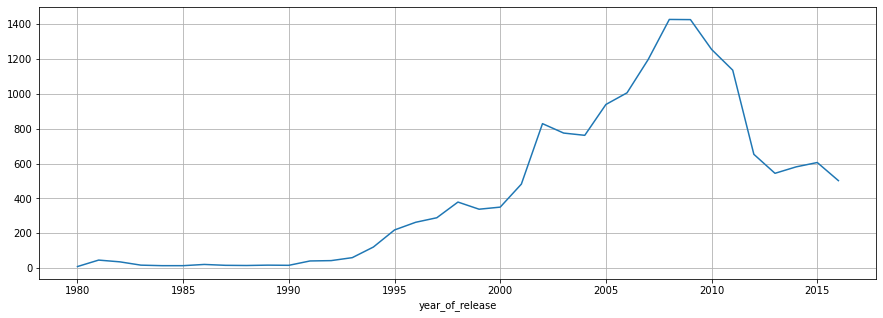

,total_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [ ]:
#Создадим сводную таблицу по годам и суммарным продажам
year_pivot= data_no_score.pivot_table(index='year_of_release',values='total_sales', aggfunc='count')
#построим графики
year_pivot.plot(grid=True,figsize=(15,5), legend=None)
plt.show()
year_pivot


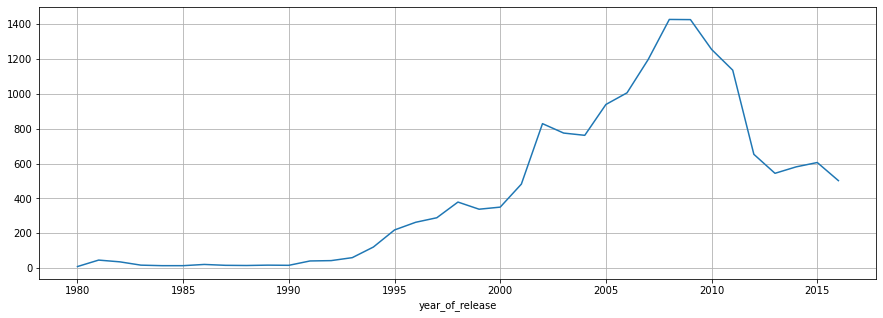

,total_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [ ]:
#Создадим сводную таблицу по годам и суммарным продажам
genre_pivot= data_no_score.pivot_table(index='year_of_release',values='genre', aggfunc='count')
#построим графики
genre_pivot.plot(grid=True,figsize=(15,5), legend=None)
plt.show()
year_pivot

Как видим, с началом нового тысячилетия начался и золотой век игра. Резкий рост с 2000, небольшая просадка в 2003 и 2004, делее взлет и пик в 2009. И затем опать спад.

Можем предположить, что рост с 2000 года связан с выходом ps2 и xbox - основных игроков текущего рынка

Пока актуальным видится период с 2001 по 2016

In [ ]:
data_no_score['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Проверить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Вопрос - За какой характерный срок появляются новые и исчезают старые платформы?

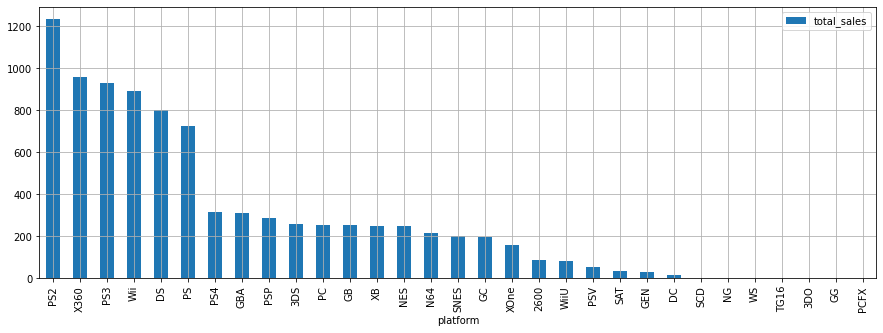

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [ ]:
#выберем самые продаваемые платформы

platform_pivot = data_no_score.pivot_table(index='platform',values='total_sales',aggfunc = 'sum')
platform_pivot.sort_values('total_sales',ascending=False).plot(kind='bar',grid=True,figsize=(15,5))
plt.show()
platform_pivot.sort_values('total_sales',ascending=False)

График показывает, что самыми попылярными платформами являются: `PS2`, `X360(он же Xbox360)`, `PS3`, `Wii` и `DS`.
При этом, `PS4`, `Xbox ONE`, `WiiU` и `P`C(как я понимаю, это ПК) на общем графике показывают слабые результаты.
Здравый смысл подсказывает, что промежутокс 2000 по 2016 год - слишком велик.
Та же `DS` уже не актуальна - поддержка прекращена в 2013 году. А значит и планировать 2017 год на эту приставку не целеообразно.

Дабы подтвердить теорию, предлагаю взять все приставки  и посмотреть на каждую из них через года

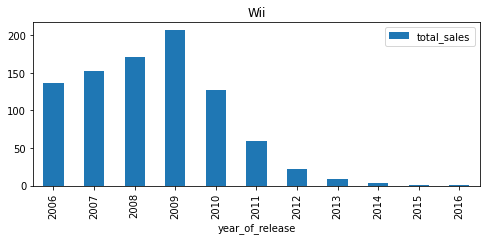

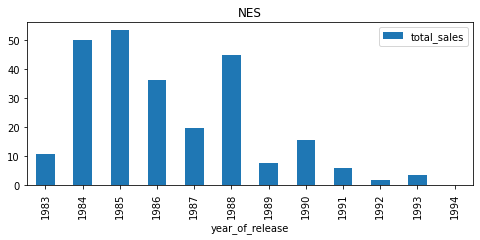

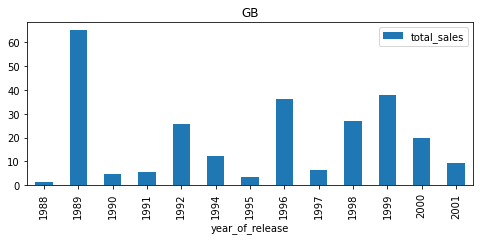

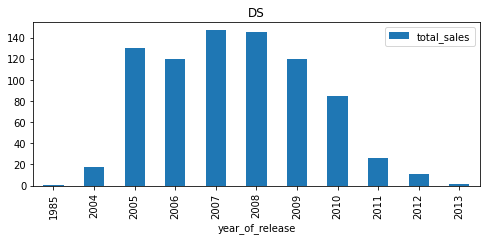

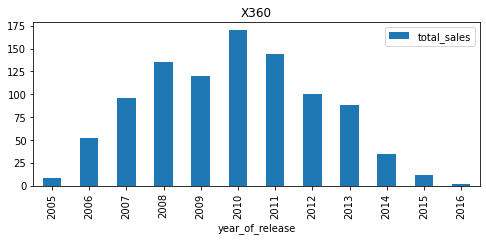

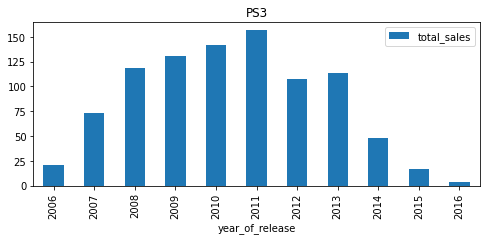

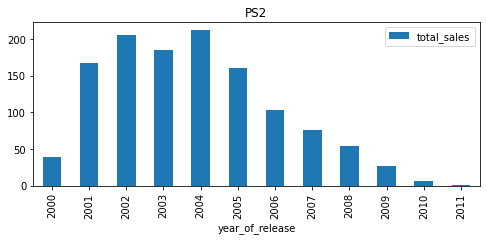

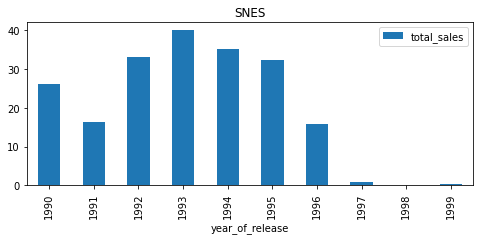

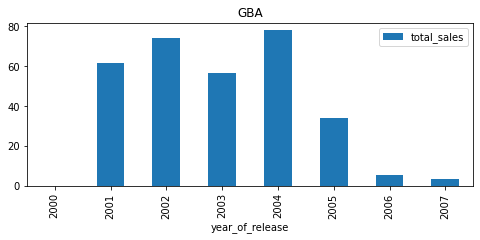

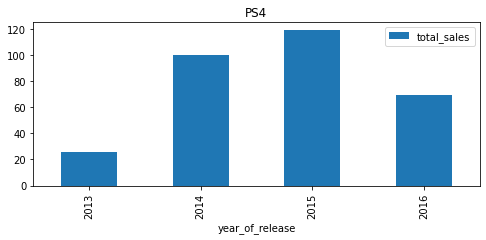

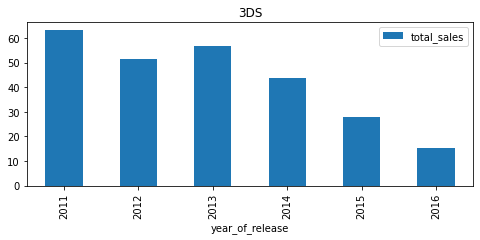

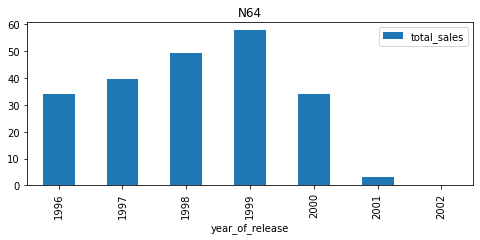

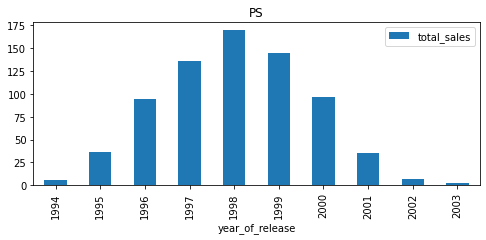

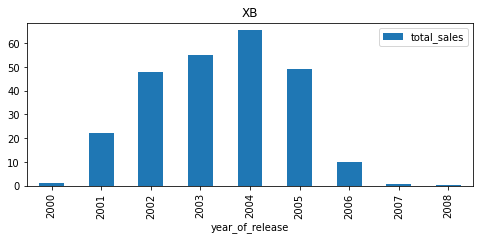

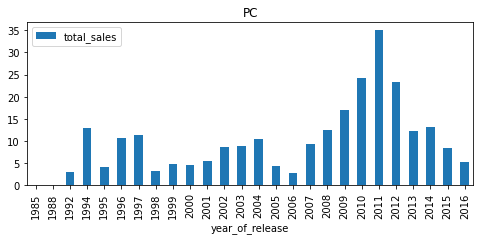

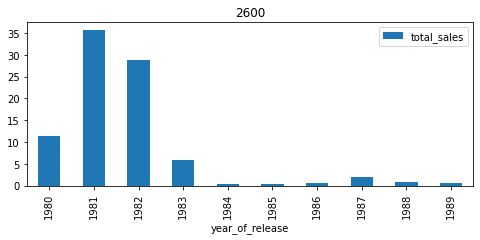

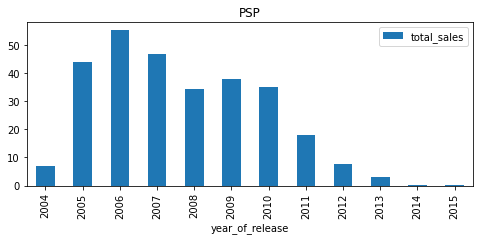

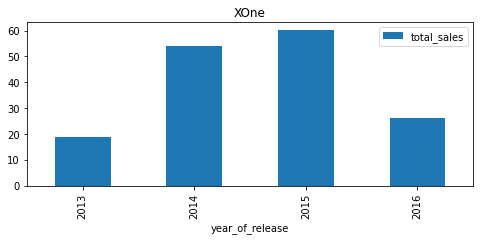

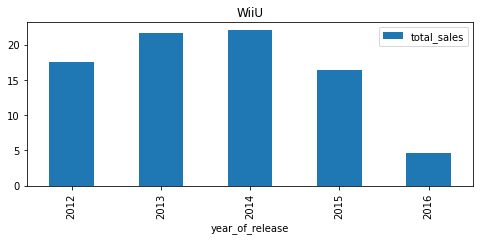

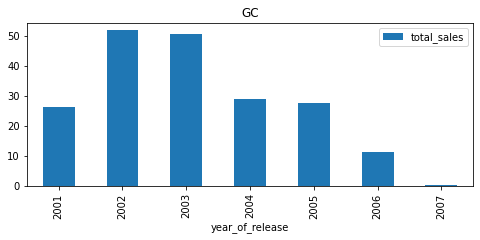

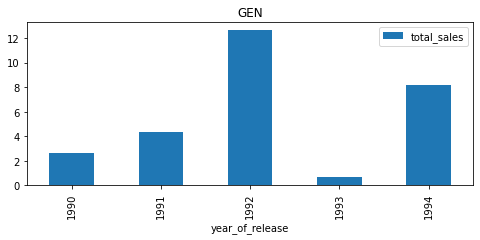

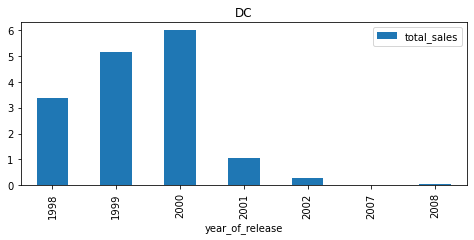

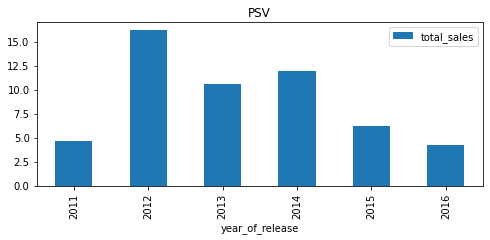

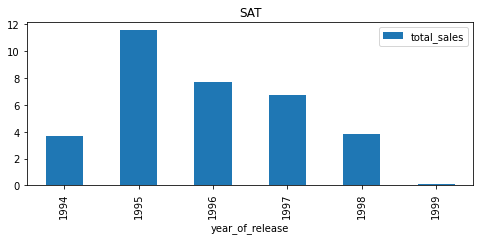

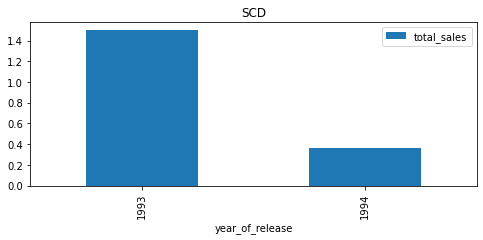

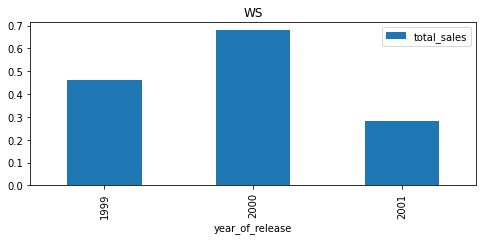

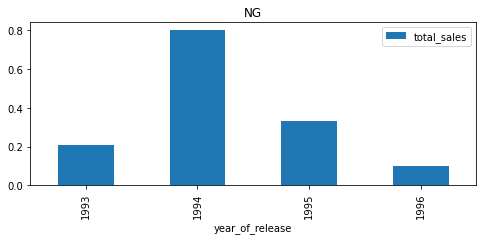

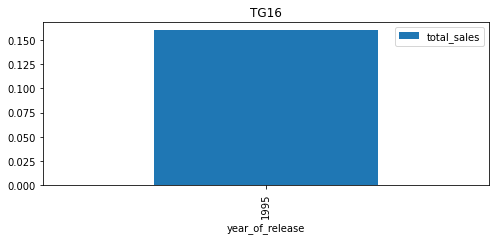

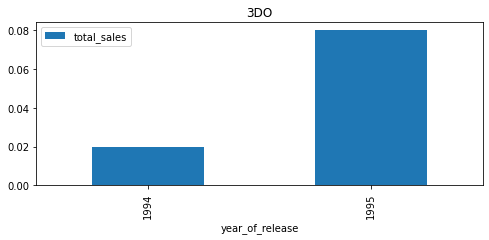

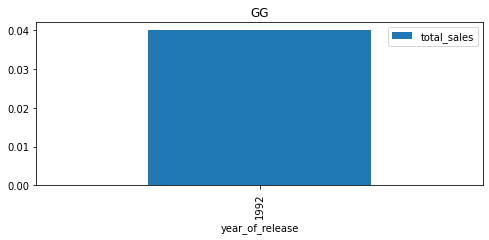

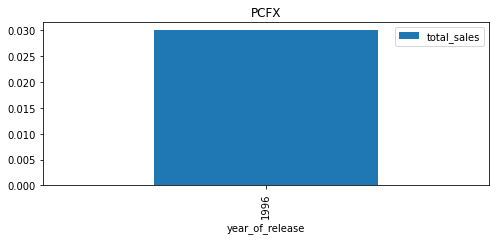

In [ ]:
#Создадим список с нужными платформами
platforms = list(data_no_score['platform'].unique())


#через цикл построим разом все графики
for platform in platforms:

    data_no_score.loc[data['platform'] == platform]\
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
        .plot(kind='bar',title=platform, figsize=(8,3))

    plt.show()

Что и требовалось доказать

### ВЫВОД

- Самым актуальным периодом явлется период с 2014 года - более из ранние годы нет смысла использовать, т.к. Могут внести помехи данные о платформах, которые на текущий год уже не актуальны
- Так же в исследования включим PC

- Средний срок "жизни" приставки(поколения приставки) - 8-10 лет

- Потенциально прибыльные платформы - PS4, Xbox One, WiiU, 3DS, PSV и PC. Хоть они и прошли свой пик и продажи пошли на спад( что не факт, учитывая неполноту данных за 2016 год), но  на текущий момент это лидеры. и до выхода приставок следующего поколения они будут чуть ли не единственными приставками на рынке


In [ ]:
actual_data = data_no_score.query('year_of_release >=2014')

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

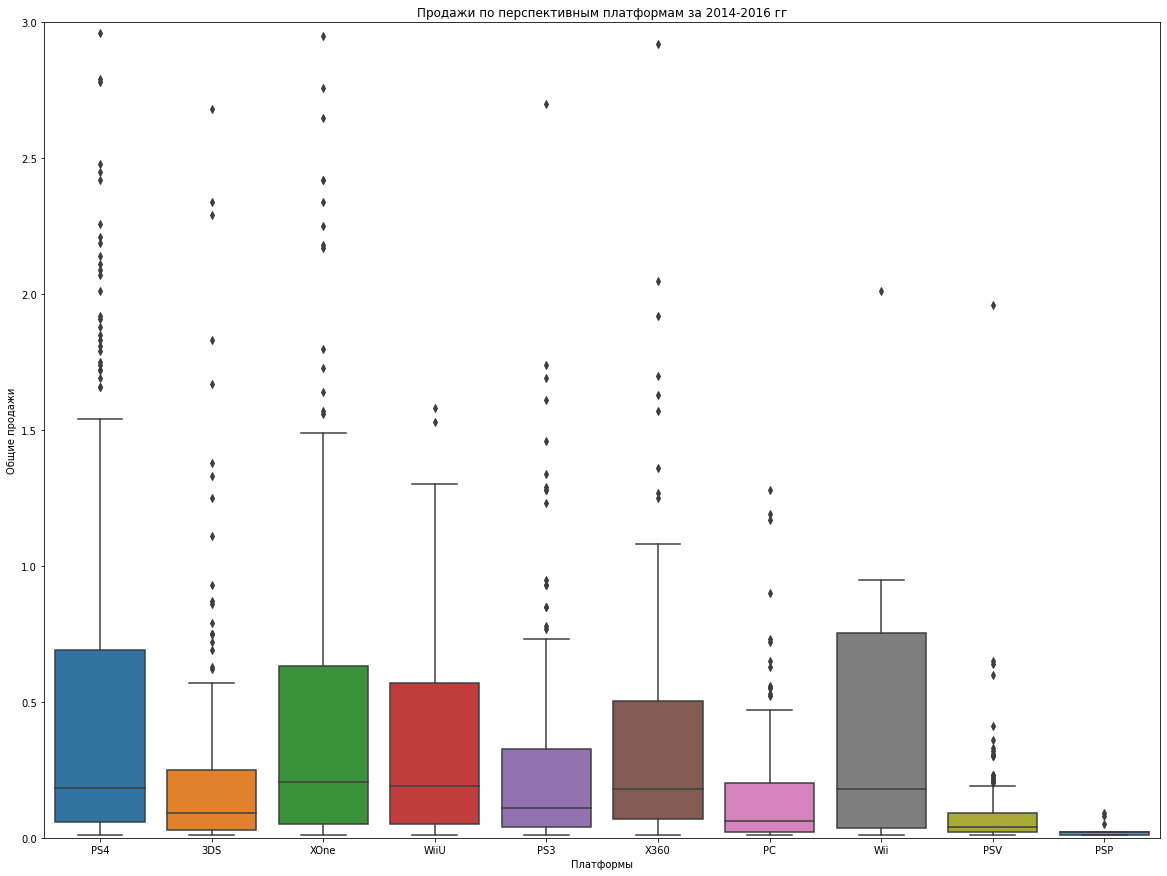

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data = actual_data, y = 'total_sales', x='platform')\
    .set(
        title = 'Продажи по перспективным платформам за 2014-2016 гг',
        xlabel = 'Платформы', ylabel = 'Общие продажи',
        ylim=(0, 3)
        )

plt.show()

In [ ]:
#Посмотрим на средние и медианные значения

sales_pivot = actual_data.pivot_table(index='platform',values='total_sales',aggfunc = ['mean','median'])
sales_pivot.columns = ['mean','median']
sales_pivot.sort_values(by=['median'],ascending=False)

,mean,median
platform,,
XOne,0.615614,0.205
WiiU,0.588767,0.190
PS4,0.766356,0.185
Wii,0.460909,0.180
X360,0.434414,0.180
PS3,0.311324,0.110
3DS,0.408868,0.090
PC,0.179139,0.060
PSV,0.075932,0.040


### ВЫВОД

Что график, что сводная таблица, говорит о ранее высказанной теории - тройка платформ - PS4, Xbox One и WiiU и их предыдущие поколения - лидеры на на 2016 год. Не смотря на спад продаж.
Так же хорошие продажи у 3DS.
Средние показатели продаж и медианы у них выше, чем у остальных платформ.
В дальнейших иследованиях нам нужны топ 5 популярных платформ - мы воьмем  и PC


### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

Тут мы вспоминаем о первоначальной таблице. С одной поправкой - сохраним в ней данные с 2014 года


In [ ]:
data = data.query('year_of_release >=2014')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [ ]:
ps4_data = data.query('platform == "PS4"')

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ PS4 ОТ ОТЗЫВОВ**

In [ ]:
#Напишем функцию для для построения графиков и подсчета корреляции

def make_graphic(data):


    data.plot(kind='scatter', x='critic_score', y='total_sales',figsize=(7,3))
    plt.show()
    data.plot(kind='scatter', x='user_score', y='total_sales',figsize=(7,3))
    plt.show()
    try:
        print(data['total_sales'].corr(data['critic_score']))
        print(data['total_sales'].corr(data['user_score']))
    except:
        print('строки и числа не корелируются')

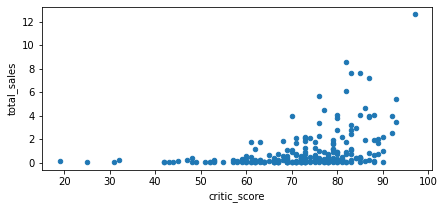

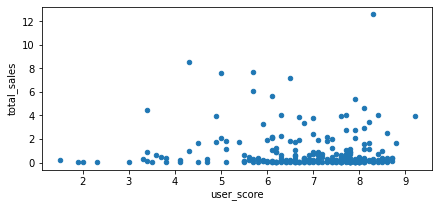

0.40266141068104083
-0.040131589472697356


In [ ]:
make_graphic(ps4_data)

**ВЫВОД**

Что отзывы критиков, что отзывы пользователей на продажи не влияют.

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ Xbox ONE ОТ ОТЗЫВОВ**

In [ ]:
xbox1_data = data.query('platform == "XOne"')

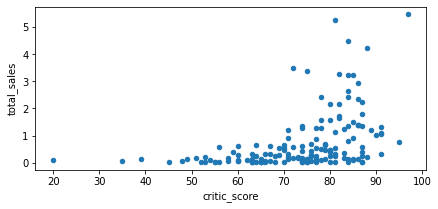

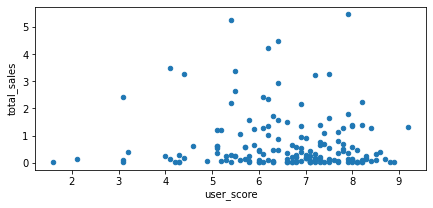

0.42867694370333226
-0.0703839280647581


In [ ]:
make_graphic(xbox1_data)

**ВЫВОД**

C Xbox'ом та же ситуация, что и с PS4 - отзывы на продажи не влияют

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ WiiU ОТ ОТЗЫВОВ**

In [ ]:
WiiU_data = data.query('platform == "WiiU"')

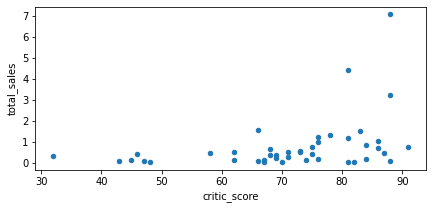

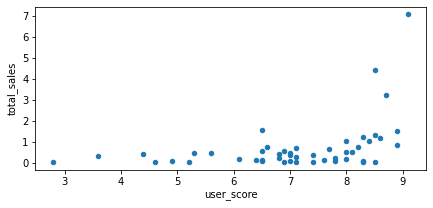

0.370201412480884
0.4079264579217078


In [ ]:
make_graphic(WiiU_data)

**ВЫВОД**

И здесь похожая ситуация. Отзывы не имеют практически никакого значения

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ PS3 ОТ ОТЗЫВОВ**

In [ ]:
ps3_data = data.query('platform =="PS3"')

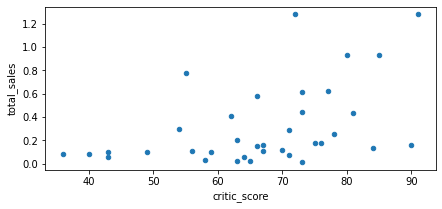

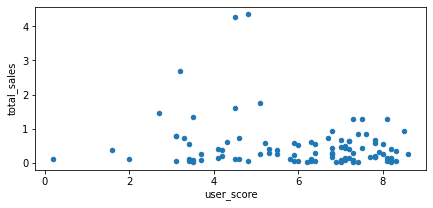

0.44657460493190704
-0.16676141347662116


In [ ]:
make_graphic(ps3_data)

**ВЫВОД**

Тут слишком мало данных для проверки корреляции

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ Xbox 360 ОТ ОТЗЫВОВ**

In [ ]:
x360_data = data.query('platform == "X360"')

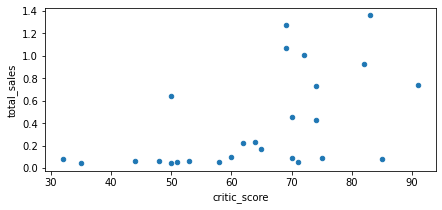

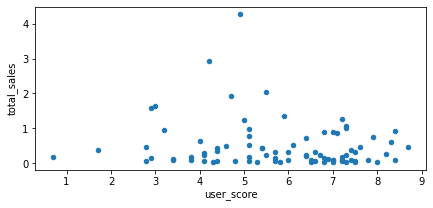

0.5257228356581523
-0.138444570945665


In [ ]:
make_graphic(x360_data)

**ПОСМОТРИМ НА ЗАВИСИМОСТЬ ПРОДАЖ Wii ОТ ОТЗЫВОВ**

In [ ]:
three_ds_data = data.query('platform == "Wii"')

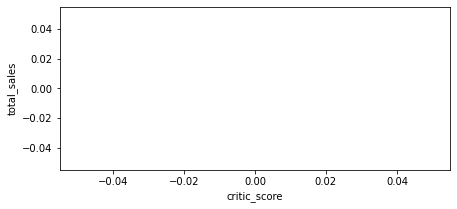

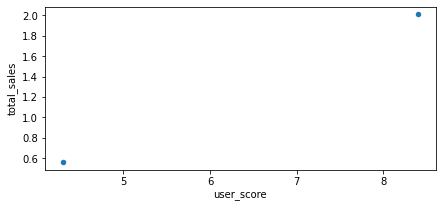

nan
1.0


In [ ]:
make_graphic(three_ds_data)

**ВЫВОД**

Построенные граффики и расчеты корреляции говорят о том, что, на удивление, отзывы критиков и пользователей не оказывают значимого эффекта на продажи игр

### ОБЩИЙ ВЫВОД

Построенные граффики и расчеты корреляции говорят о том, что, на удивление, отзывы критиков и пользователей не оказывают значимого эффекта на продажи игр

### Посмотреть на общее распределение игр по жанрам. Вопрос - Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

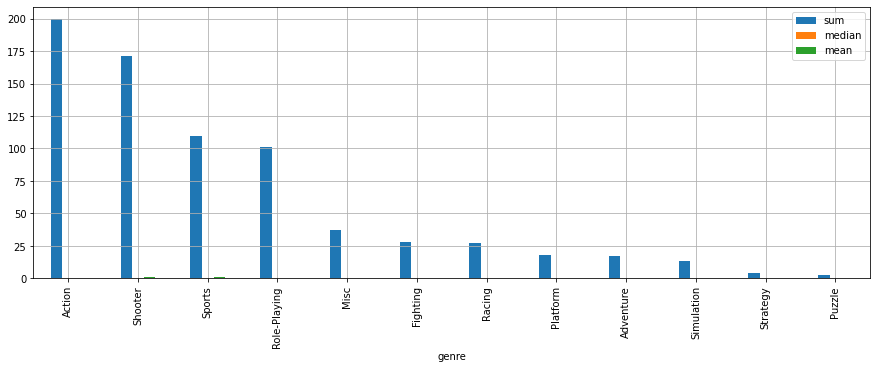

,sum,median,mean
genre,,,
Shooter,170.94,0.515,1.335469
Sports,109.48,0.180,0.680000
Platform,18.09,0.140,0.476053
Fighting,28.22,0.125,0.470333
Role-Playing,101.44,0.110,0.459005
Racing,27.52,0.090,0.398841
Misc,37.55,0.090,0.332301
Action,199.36,0.090,0.322068
Simulation,13.13,0.100,0.298409


In [ ]:
genre_pivot = actual_data.pivot_table(index='genre',values='total_sales', aggfunc=['sum','median','mean'])
genre_pivot.columns = ['sum','median','mean']
genre_pivot.sort_values('sum',ascending=False).plot(kind='bar',grid=True,figsize=(15,5))
plt.show()
genre_pivot.sort_values('mean',ascending=False)

### Вывод



Из графика и таблицы видно, что самыми интересными жанрами являются:
- `Action` - 199 млн
- `Shooter` - 170 млн
- `Sports` - 110млн
- `Role-Playing`- более 100 млн.

далее следуют жанры с примерно одинаковыми суммарными продажами Misc, Racing, Fighting, Platform, Adventure, Simulation (около 20 млн.)

При этом видно, что медианные показатели сильно отличаются - оно и понятно. Индустрия такова, что прибыль всегда уходит какой-нибудь популярной игре, вне зависимости от ее жанра.

И если же судить по средней цене , то рейинг следующий:

- `Shooter`
- `Sports`
- `Platform`
- `Fighting`
- `Role-Playing`



## Составить портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.

 - Самые популярные жанры (топ-5). Поясните разницу.

 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

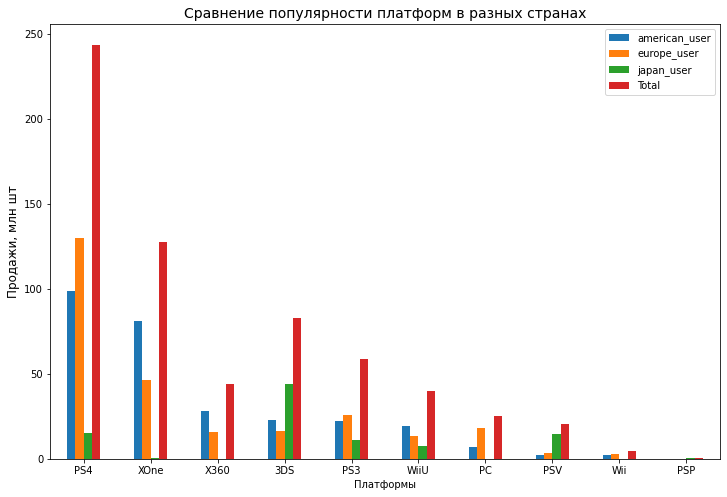

  platform  american_user  europe_user  japan_user   Total
3      PS4          98.61       130.04       15.02  243.67
9     XOne          81.27        46.25        0.32  127.84
8     X360          28.30        15.49        0.08   43.87
0      3DS          22.64        16.12       44.24   83.00
2      PS3          22.05        25.54       11.22   58.81
7     WiiU          19.36        13.15        7.31   39.82
1       PC           7.23        17.97        0.00   25.20
5      PSV           2.52         3.53       14.54   20.59
6      Wii           2.08         2.59        0.00    4.67
4      PSP           0.00         0.00        0.36    0.36


In [ ]:
# сумма проданных копий для Северной Америки по платформам
na_platform = data.groupby(['platform'])['na_sales'].agg(['sum'])

# сумма проданных копий для Европы по платформам
eu_platform = data.groupby(['platform'])['eu_sales'].agg(['sum'])

# сумма проданных копий для Японии по платформам
jp_platform= data.groupby(['platform'])['jp_sales'].agg(['sum'])

# объединяем таблицs

users_platform = pd.concat([na_platform, eu_platform, jp_platform], axis=1).reset_index()

users_platform.columns = ['platform', 'american_user', 'europe_user', 'japan_user']

users_platform = users_platform.sort_values(by='american_user', ascending=False)

users_platform['Total'] = users_platform['american_user'] + users_platform['europe_user'] + users_platform['japan_user']

# строим bar plot

users_platform.plot.bar(x="platform", rot=0, figsize =(12, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=14)
plt.xlabel('Платформы', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()


#выводим сводную таблицу
print(users_platform)


**ВЫВОД**


Из графика и таблицы видно:

- Чаще всего приставки и игры покупаю жители Северной Америки - почти 180 млн. покупок за 3 года
- на втором месте европейцы - примерно 160 млн. продаж
- японцы - 35 миллионов (их и самих немного)
- самая популярная приставка у американцев - PS4, затем  Xbox ONE  и Xbox 360
- Самая популярная приставка у европейцев - также PS4, следом Xbox ONE и PS3
- Самая популярная приставка у японцев - 3DS, следом PS4 и  WiiU
- В совокупности, ярким лидером является PS4. Далее Xbox ONE  и 3DS


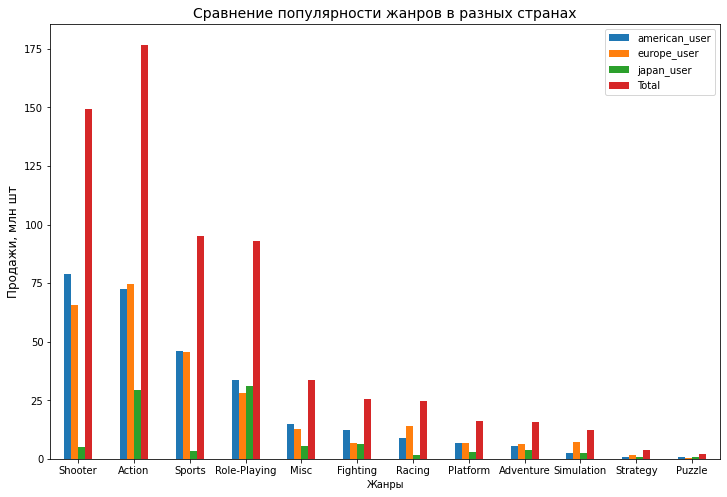

           genre  american_user  europe_user  japan_user   Total
8        Shooter          79.02        65.52        4.87  149.41
0         Action          72.53        74.68       29.58  176.79
10        Sports          46.13        45.73        3.26   95.12
7   Role-Playing          33.47        28.17       31.16   92.80
3           Misc          15.05        12.86        5.61   33.52
2       Fighting          12.43         6.69        6.37   25.49
6         Racing           8.74        14.13        1.76   24.63
4       Platform           6.79         6.80        2.69   16.28
1      Adventure           5.64         6.49        3.60   15.73
9     Simulation           2.63         7.30        2.31   12.24
11      Strategy           0.98         1.79        0.95    3.72
5         Puzzle           0.65         0.52        0.93    2.10


In [ ]:
# сумма проданных копий для Северной Америки по жанрам
na_genre = actual_data.groupby(['genre'])['na_sales'].agg(['sum'])

# сумма проданных копий для Европы по платформам
eu_genre = actual_data.groupby(['genre'])['eu_sales'].agg(['sum'])

# сумма проданных копий для Японии по платформам
jp_genre = actual_data.groupby(['genre'])['jp_sales'].agg(['sum'])

# объединяем таблиц

users_genre = pd.concat([na_genre, eu_genre, jp_genre], axis=1).reset_index()

users_genre.columns = ['genre', 'american_user', 'europe_user', 'japan_user']

users_genre = users_genre.sort_values(by='american_user', ascending=False)

users_genre['Total'] = users_genre['american_user'] + users_genre['europe_user'] + users_genre['japan_user']

# строим bar plot

users_genre.plot.bar(x="genre", rot=0, figsize =(12, 8))
plt.title('Сравнение популярности жанров в разных странах', fontsize=14)
plt.xlabel('Жанры', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()



print(users_genre)

**ВЫВОД**

- Самый поплярный жанр во всех регионах - Shooter
- В Америке и Европе вкусы схожи - следом за Shooter идут Action, Sports, Misc и Fighting
- В Японии же Role-Playing на первом месте, далее Action, Shooter, Fighting и Platform  
- По совокупной сумме так же лидирует Shooter - 114 млн.
  Следом идут Action и Sports c небольшой разницей друг с другом.
  Role-Playing не сильно  отстает от тройки лидеров - 45 млн покупок
  Закрывает пятерку Fighting с 18 млн копий

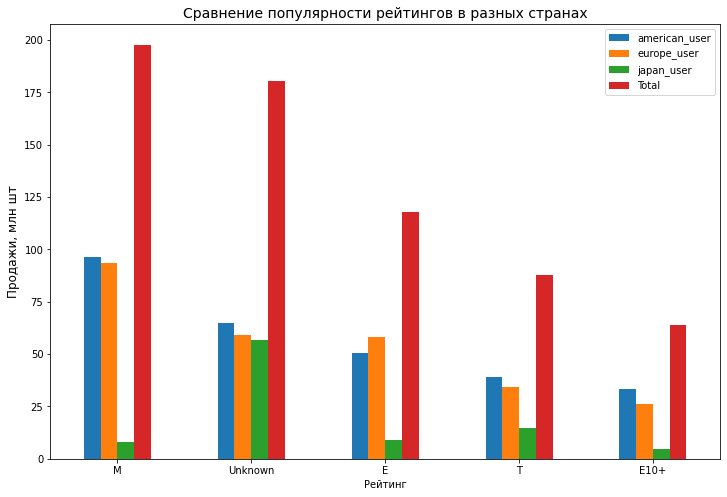

    rating  american_user  europe_user  japan_user   Total
2        M          96.42        93.44        8.01  197.87
4  Unknown          64.72        58.95       56.90  180.57
0        E          50.74        58.06        8.94  117.74
3        T          38.95        34.07       14.78   87.80
1     E10+          33.23        26.16        4.46   63.85


In [ ]:
# сумма проданных копий для Северной Америки по платформам
na_rating = data.groupby(['rating'])['na_sales'].agg(['sum'])

# сумма проданных копий для Европы по платформам
eu_rating = data.groupby(['rating'])['eu_sales'].agg(['sum'])

# сумма проданных копий для Японии по платформам
jp_rating= data.groupby(['rating'])['jp_sales'].agg(['sum'])

# объединяем таблицs

users_rating = pd.concat([na_rating, eu_rating, jp_rating], axis=1).reset_index()

users_rating.columns = ['rating', 'american_user', 'europe_user', 'japan_user']

users_rating = users_rating.sort_values(by='american_user', ascending=False)

users_rating['Total'] = users_rating['american_user'] + users_rating['europe_user'] + users_rating['japan_user']

# строим bar plot

users_rating.plot.bar(x="rating", rot=0, figsize =(12, 8))
plt.title('Сравнение популярности рейтингов в разных странах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()


#выводим сводную таблицу
print(users_rating)

In [ ]:
data.info()

**ВЫВОД**

- Чаще всего покупают игры рейтинга М - почти 200 млн.
- Далее игры без рейтинга -  180 млн. копий на три региона
- категория Е - 118 млн.
- Рейтинг Т - 88 млн
- Рейтинг Е10+  - 64 млн.

По регионам картина следующая:

- В Америке и Европе предпочтения в рейтинге игр схож - М, Е, без рейтинга, Т, Е10+
- В Японии же картина отличается - в Японии не любт себя ограничивать, потому игры без рейтинга покупают больше, чем остальные игры в совокупности

### Общий вывод

Предпочтения пользователей Америки и Европы во многом схожи:
- самыми популярными платформами являются Xbox ONE и PS4
- Любимые жанры - Shooter и Action, игры с рейтингом М
Предпочтения пользователей из Японии немного отличаются:
- самой популярной платформой являются 3Ds, PS4 и Xbox One
- любимые жанры - Role-Playing и Action и игры без рейтинга.

## 5 Проверка гипотез


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Нулевая гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC не  равны

In [ ]:
#Удалим из data['user_score'] пропуски

data = data.dropna(subset=['user_score'])

In [ ]:
# Составим список значений по Xbox One и PC
xbox_score = list(data[data['platform'] == 'XOne']['user_score'])


pc_score = list(data[data['platform'] == 'PC']['user_score'])

results = st.ttest_ind(xbox_score,pc_score)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулеую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


**Вывод**: p-значение: 0.10450507919348415


P-значение больше значения alpha, что дает основание принять предположение о равности  средних пользовательских рейтингов платформ Xbox One и PC

**Нулевая гипотеза** - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

**Альтернативная гипотеза** - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [ ]:
action_score = list(data[data['genre']=='Action']['user_score'])
sports_score = list(data[data['genre']=='Sports']['user_score'])

results = st.ttest_ind(action_score,sports_score)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулеую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

**Вывод**: p-значение: 2.8711147985105864e-19

Нулевой теорией мы указали равность средних и отвергли ее, следовательно гипотеза о равности средних пользовательских рейтингов Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

# Итоговый вывод

## В ходе выполнения проекта были пройдены следущие шаги:

###  Предобработка данных


- Поправили названия столбцов.

- Удалили пропуски

- Разделили данные на две таблицы:

    первоначальная data - хранить всю информацию
    
    data_no_score - данные без столбцов рейтинга и отзывов
    
- добавили столбец total_sales с информацией о суммарных продажах по регионам

### Исследовательский анализ

- Посчитали, сколько игр выпускалось в разные годы.

- Проверили, как менялись продажи по платформам.

- Выбрали платформы с наибольшими суммарными продажами и построить распределение по годам.

- Взять данные за соответствующий актуальный период и отбросили лишние данные

- Выберали несколько потенциально прибыльных платформ.

- Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описали результат.

- Проверили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

- Построилт диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.

- Соотнесли выводы с продажами игр на других платформах.

- Оценили на общее распределение игр по жанрам.


**ВЫВОДЫ**

  - Самым актуальным периодом явлется период с 2014 года - более из ранние годы нет смысла использовать, т.к. могут внести помехи данные о платформах, которые на текущий год уже не актуальны.
  - Средний срок "жизни" приставки(поколения приставки) - 8-10 лет.
  - Потенциально прибыльные платформы - PS4, Xbox One, WiiU, 3DS, PSV и PC. Хоть они и прошли свой пик и продажи пошли на спад, но на текущий момент это лидеры. и до выхода приставок следующего поколения они будут чуть ли не единственными приставками на рынке
  - Тройка платформ - PS4, Xbox One и WiiU и их предыдущие поколения - лидеры на на 2016 год. Не смотря на спад продаж.
  - На удивление, отзывы критиков и пользователей не оказывают значимого эффекта на продажи игр
  - Самыми интересными жанрами являются:

        Action - 199 млн

        Shooter - 170 млн

        Sports - 110млн

        Role-Playing- более 100 млн.

далее следуют жанры с примерно одинаковыми суммарными продажами Misc, Racing, Fighting, Platform, Adventure, Simulation (около 20 млн.)

Предпочтения пользователей Америки и Европы во многом схожи:
- самыми популярными платформами являются Xbox 360 и PS3
- Любимые жанры - Shooter и Action, игры с рейтингом М

Предпочтения пользователей из Японии немного отличаются:
- самой популярной платформой являются PS3 и Wii
- любимые жанры - Role-Playing и Action и игры с рейтингом Е.

### Проверили гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **гипотеза подтвердилась**

Средние пользовательские рейтинги жанров Action и Sports разные - **гипотеза подтвердилась**



<div style="border:solid Chocolate 2px; padding: 40px">

<h2> Общий вывод по проекту <a class="tocSkip"> </h2>

Спасибо за твой проект! Проделана большая работа, и видно твое внимательное отношение к содержанию анализа и к оформлению. Ты молодец! Практически все ключевые этапы работы над проектом выполнены, код логичен и понятен, комментарии и выводы написаны, так что в целом справиться с задачей тебе удалось. Возле моментов, на которые стоит обратить внимание, я оставила комментарии.
    
**Отдельно хочу отметить положительные моменты в твоей работе:**
    
* На всех этапах тобой предложены интересные решения и методы для их реализации.
* Ты грамотно используешь визуализацию. Это здорово, т.к. помогает быстро считать информацию получателю отчета.
* Ты грамотно делаешь выводы, на основе полученной информации.
    
**Моменты, требующие внимания:**


* Проверь работоспособность кода.
* Стоит оценить прибыльность жанров на основе средних или медианных продаж.
* Скорректируй анализ популярности платформ в регионах.
* Нужно добавить в оценку влияния вида возрастного рейтинга ESRB на продажи игры, в которых рейтинг не указан, внеси полученные результаты в вывод.
* И обязательно соотнести итоговый вывод, после учета всех комментариев.
* Остальные рекомендации ты найдешь в моих комментариях!    
    
**Желаю удачи и жду твой проект на повторное ревью!**